## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [105]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [107]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
IMAGE_SIZE=[244,244]
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [108]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [109]:
  # useful for getting number of output classes
folders = glob('Datasets/Train')

In [110]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [121]:
prediction = Dense(len(range(folders)), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [122]:

# view the structure of the model
model.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [123]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)


In [124]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [125]:
# Make sure you provide the same target size as initialied for the image size
train_generator = train_datagen.flow_from_directory('Datasets/Train/', 
                                                    target_size = (224, 224), 
                                                    batch_size = 32,
                                                    class_mode = 'categorical') 

Found 64 images belonging to 3 classes.


In [126]:
train_generator

In [127]:
test_set = test_datagen.flow_from_directory('Datasets/Test/', 
                                                    target_size = (224, 224), 
                                                    batch_size = 32,
                                                    class_mode = 'categorical') 

Found 58 images belonging to 3 classes.


In [144]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  train_generator,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(train_generator),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 11s 7s/step - loss: 2.6348 - accuracy: 0.6719 - val_loss: 5.5821 - val_accuracy: 0.3966
Epoch 2/50
2/2 [==============================] - 7s 5s/step - loss: 3.7549 - accuracy: 0.5625 - val_loss: 15.1301 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 7s 5s/step - loss: 7.5777 - accuracy: 0.3750 - val_loss: 6.9214 - val_accuracy: 0.5517
Epoch 4/50
2/2 [==============================] - 7s 5s/step - loss: 4.0204 - accuracy: 0.5781 - val_loss: 2.9087 - val_accuracy: 0.7069
Epoch 5/50
2/2 [==============================] - 7s 5s/step - loss: 2.1121 - accuracy: 0.5938 - val_loss: 4.0393 - val_accuracy: 0.6552
Epoch 6/50
2/2 [==============================] - 7s 5s/step - loss: 1.3796 - accuracy: 0.7812 - val_loss: 3.5699 - val_accuracy: 0.5345
Epoch 7/50
2/2 [==============================] - 7s 5s/step - loss: 0.6815 - accuracy: 0.8281 - val_loss: 3.0385 - val_accuracy: 0.5690
Epoch 8/50
2/2 [=======================

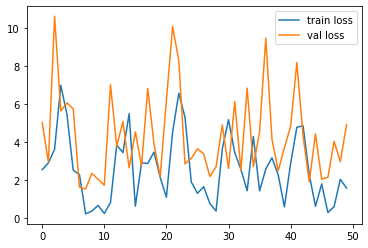

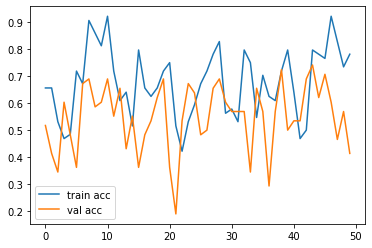

<Figure size 432x288 with 0 Axes>

In [132]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [135]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [136]:

y_pred = model.predict(test_set)


2/2 [==============================] - 4s 1s/step


In [137]:
y_pred

array([[3.0335303e-19, 9.9999928e-01, 7.3170503e-07],
       [6.2833440e-22, 1.0000000e+00, 2.3586124e-09],
       [6.5057602e-15, 9.9990439e-01, 9.5604817e-05],
       [1.0364970e-15, 3.7854402e-06, 9.9999619e-01],
       [7.2552024e-14, 9.9999833e-01, 1.6163621e-06],
       [1.0732857e-13, 9.9997628e-01, 2.3694729e-05],
       [4.2443317e-27, 4.8045558e-07, 9.9999952e-01],
       [6.3998524e-21, 9.9945134e-01, 5.4865074e-04],
       [8.6854110e-21, 1.0000000e+00, 2.1965560e-10],
       [6.9226836e-20, 9.9999928e-01, 6.6702859e-07],
       [4.8824883e-23, 1.0000000e+00, 1.9255040e-11],
       [1.1746637e-17, 8.7420094e-06, 9.9999130e-01],
       [5.6077071e-10, 3.4006131e-01, 6.5993875e-01],
       [3.6068767e-16, 9.9997151e-01, 2.8503206e-05],
       [2.6966848e-22, 9.9999940e-01, 5.9493328e-07],
       [1.5875391e-15, 9.9945110e-01, 5.4895208e-04],
       [3.5350380e-16, 9.9999118e-01, 8.8121869e-06],
       [1.8004161e-20, 1.0000000e+00, 3.2242466e-09],
       [1.1553952e-19, 9.994

In [138]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [139]:
y_pred

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1], dtype=int64)

In [140]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [141]:
model=load_model('model_resnet50.h5')

In [148]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



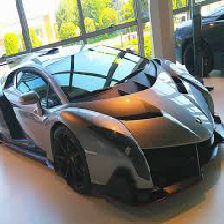

In [150]:
img

In [151]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [152]:
x.shape

(224, 224, 3)

In [153]:
x=x/255

In [154]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [155]:
model.predict(img_data)

1/1 [==============================] - 1s 953ms/step


array([[0.19406302, 0.8000586 , 0.00587839]], dtype=float32)

In [156]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 89ms/step


In [157]:
a==1

array([ True])